# Decision trees and random forests

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve



In [2]:
car_data = pd.read_csv('./data/cardataset/data.csv')

In [3]:
car_data

Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
0                   6.0            MANUAL   rear wheel drive              2.0   
1                   6.0            MANUAL   rear wheel drive              2.0   
2                   6.0            MANUAL   rear wheel drive              2.0   
3                   6.0            MANUAL   rear wheel drive              2.0   
4                   6.0            MANUAL   rear wheel drive              2.0   
...                 ...               ...                ...              ...   
11909               6.0         AUTOMATIC    all wheel drive              4.0   
11910               6.0         AUTOMATIC    all wheel drive              4.0   
11911               6.0         AUTOMATIC    all wheel drive              4.0   
11912               6.0         AUTOMATIC    all wheel drive              4.0   
11913               6.0         AUTOMATIC  front wheel drive              4.0   

                             Market Category Vehicle Size  Vehicle Style  \
0      Factory Tuner,Luxury,High-Performance      Compact          Coupe   
1                         Luxury,Performance      Compact    Convertible   
2                    Luxury,High-Performance      Compact          Coupe   
3                         Luxury,Performance      Compact          Coupe   
4                                     Luxury      Compact    Convertible   
...                                      ...          ...            ...   
11909             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11910             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11911             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11912             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11913                                 Luxury      Midsize          Sedan   

       highway MPG  city mpg  Popularity   MSRP  
0               26        19        3916  46135  
1               28        19        3916  40650  
2               28        20        3916  36350  
3               28        18        3916  29450  
4               28        18        3916  34500  
...            ...       ...         ...    ...  
11909           23        16         204  46120  
11910           23        16         204  56670  
11911           23        16         204  50620  
11912           23        16         204  50920  
11913           26        17          61  28995  

[11914 rows x 16 columns]

In [4]:
car_data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [5]:
print(car_data.dtypes)
 

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


In [6]:
cat_cols = car_data.select_dtypes(include=['object']).columns # cat_features 
# cat_features = ['Make', 'Model','Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Market Category','Vehicle Style']
cat_cols

Index(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'],
      dtype='object')

# Description of the data columns

- Make = Car company name (string)
- Model = Model of the car (string)
- Year = Year of the car (integer)
- Engine Fuel Type = Engines fuel type, which means the type of fuel the car uses (string)
- Engine HP = Engine Horse Power, which means the power of the engine (int)
- Engine Cylinders = Number of cylinders in the engine (int)
- Transmission Type = Type of transmission (string)
- Driven_Wheels = Type of wheels driven by the engine, meaning how the car moves (string)
- Number of Doors = Number of doors in the car (int)
- Market Category = Market category of the car, which means the type of the car is marketed (string)
- Vehicle Size = Size of the car, categorical (string)
- Vehicle Style = What style of vehicle it is, categorical (string)
- highway MPG = MPG is miles per gallon, which means how many miles the car can go per gallon of fuel on a highway (integer)
- city mpg = how many miles the car can go per gallon of fuel in the city (integer)
- Popularity = score of the popularity of the car (integer)
- MSRP = Manufacturer's Suggested Retail Price, which means the price of the car (integer)


# Visualizations


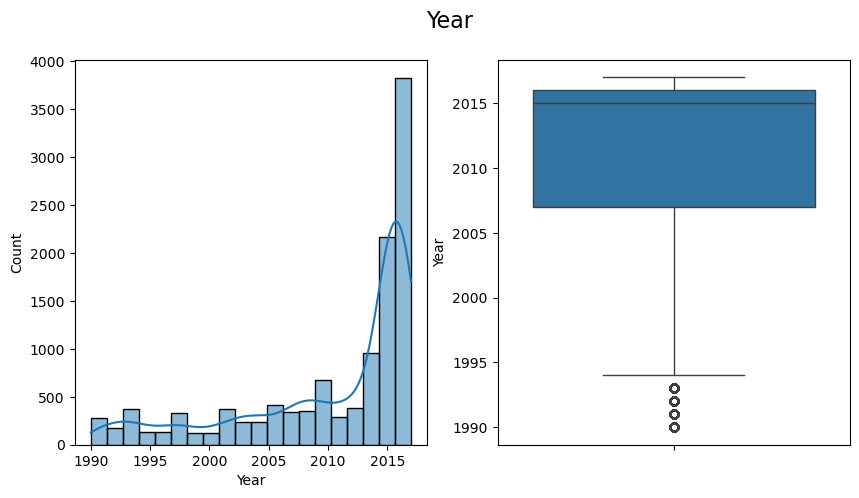

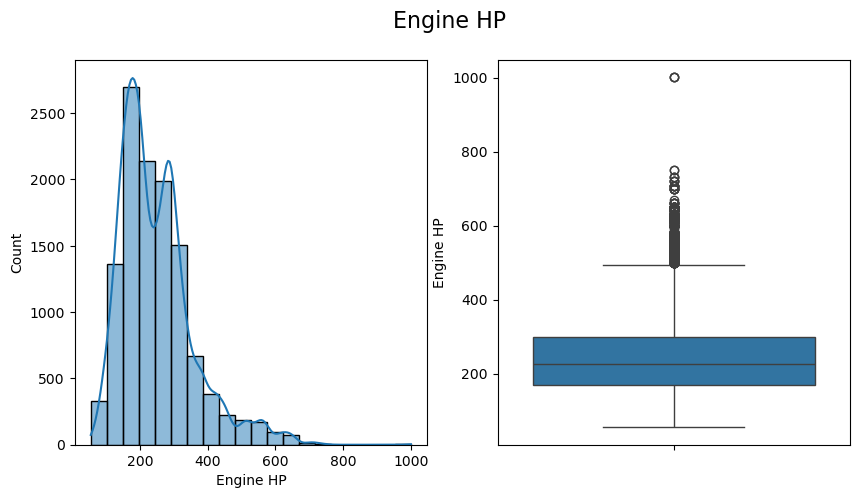

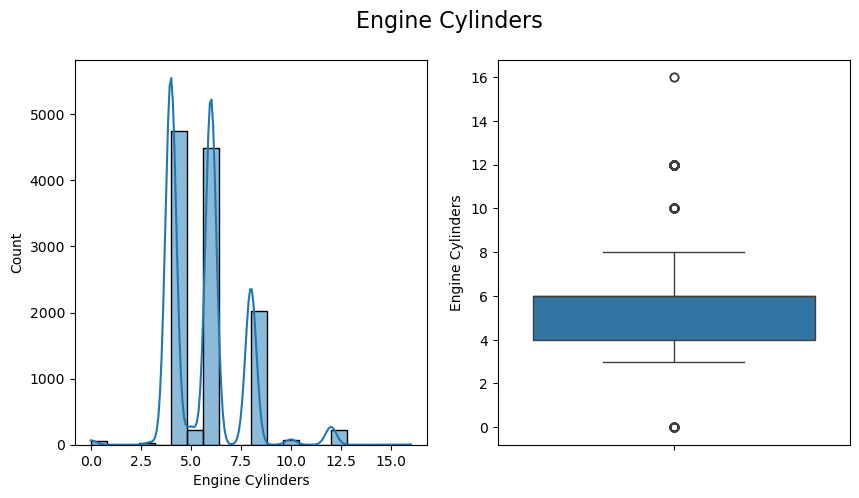

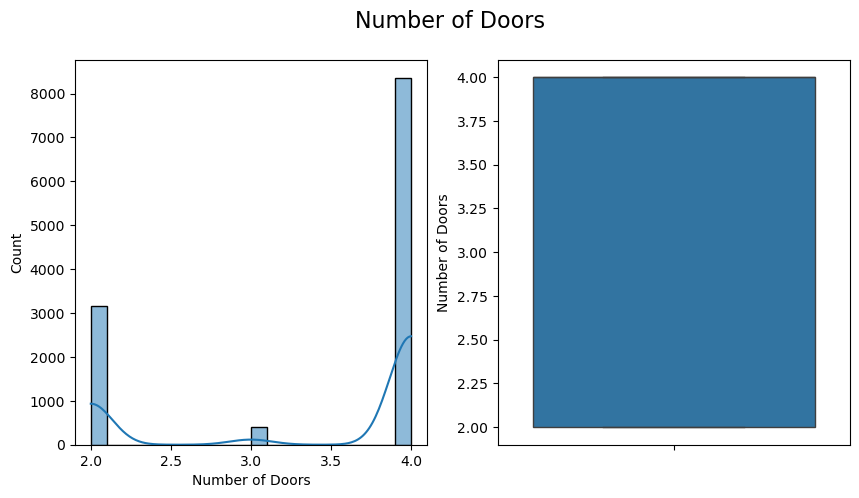

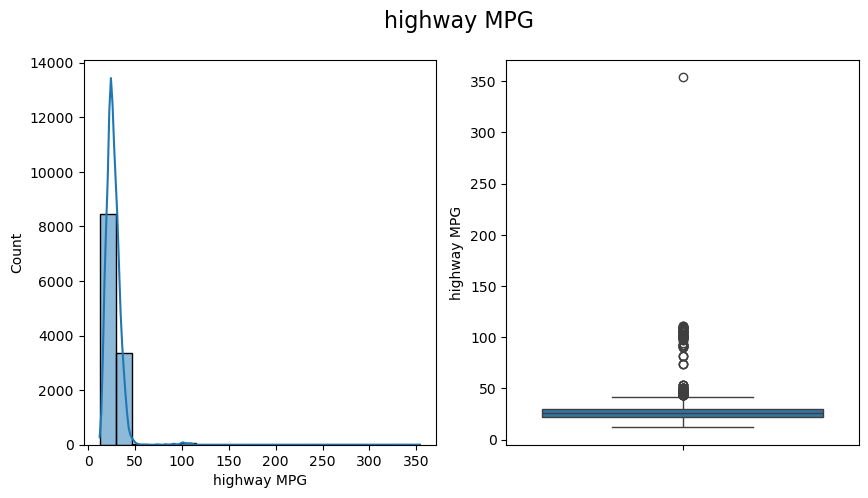

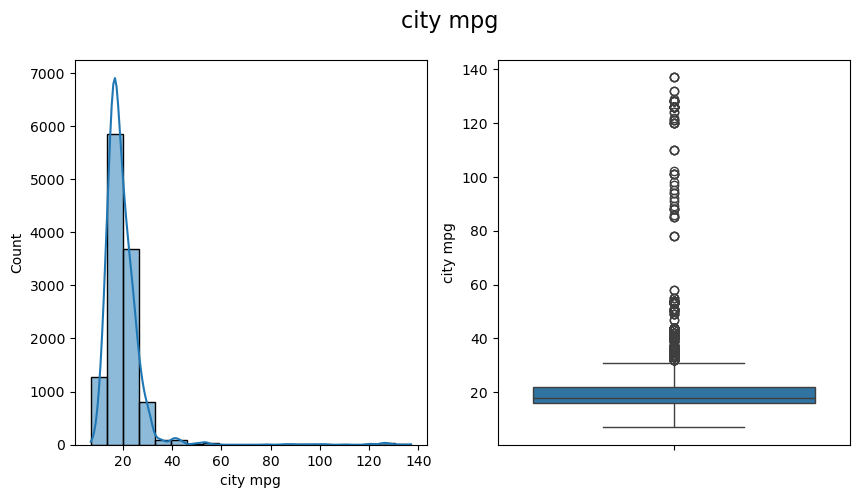

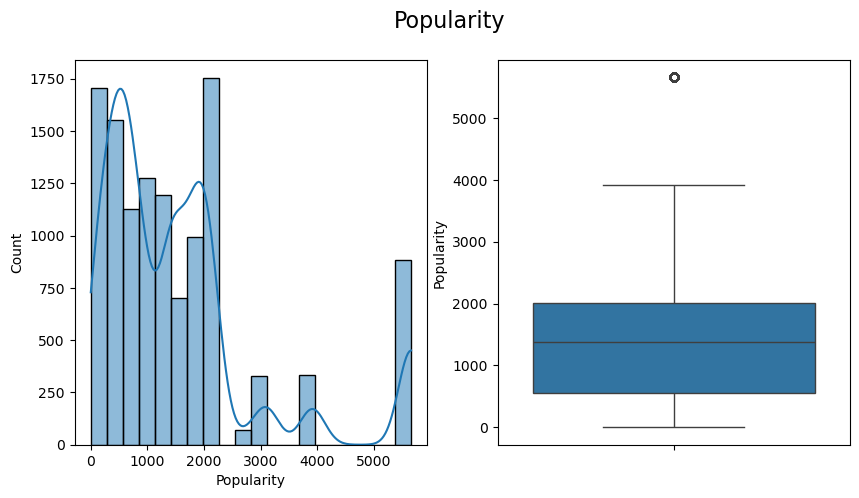

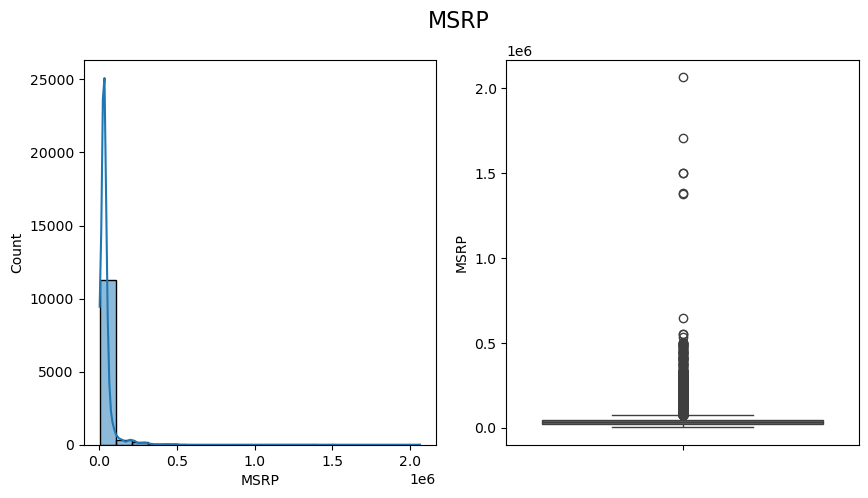

In [7]:

numerical_columns = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']

# Plot histograms for numerical columns
for col in numerical_columns:
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    sns.histplot(car_data[col], bins=20, kde=True, ax=ax[0])
    sns.boxplot(y=car_data[col], ax=ax[1])
    fig.suptitle(col, fontsize=16)
    plt.show()


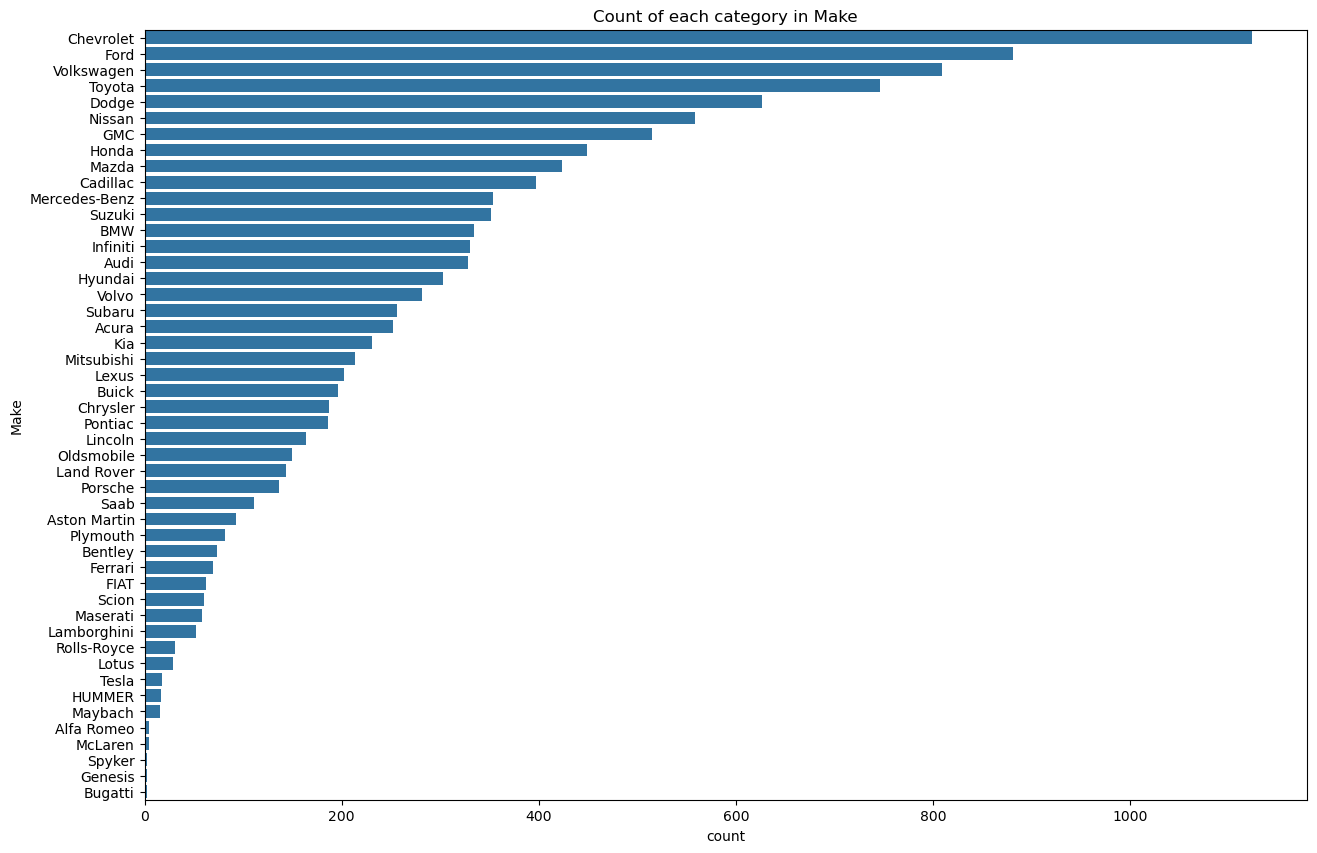

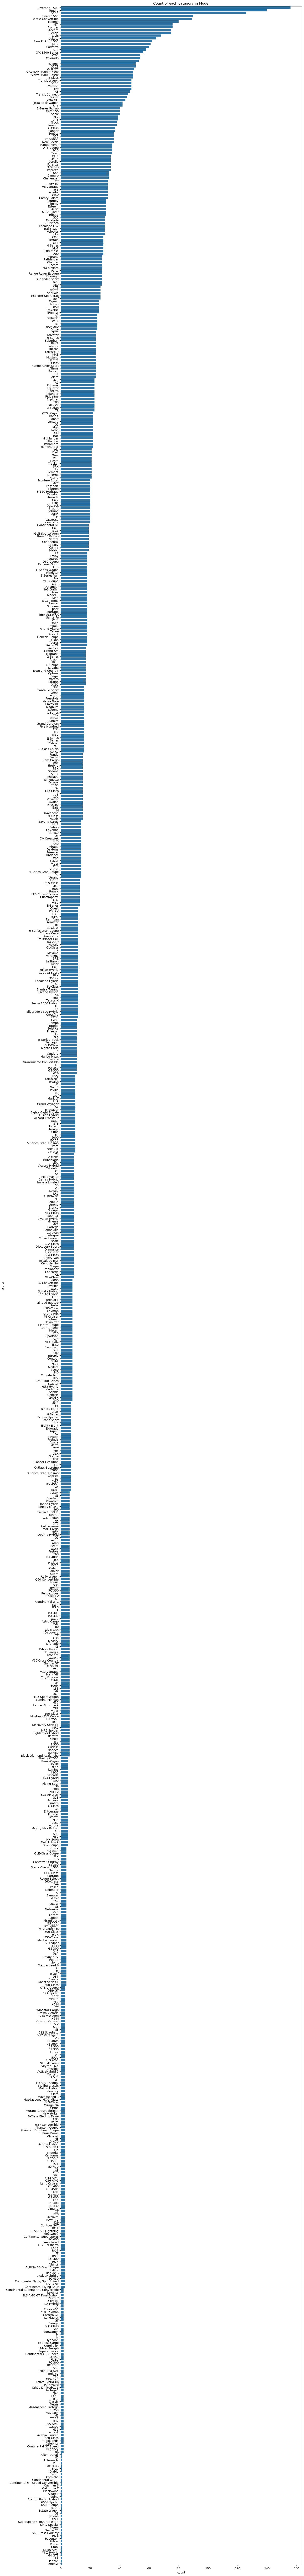

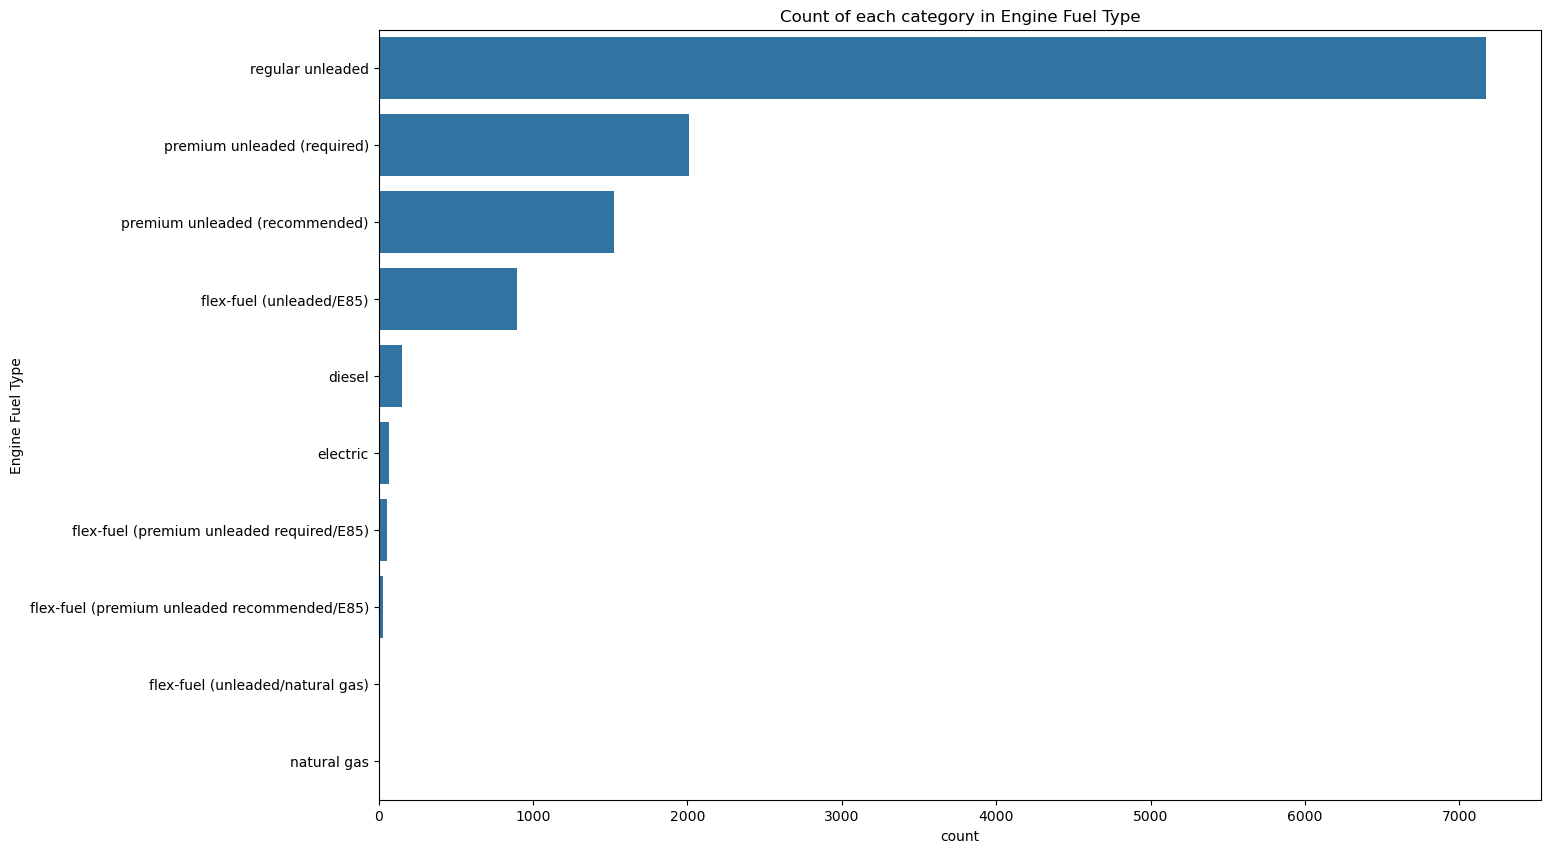

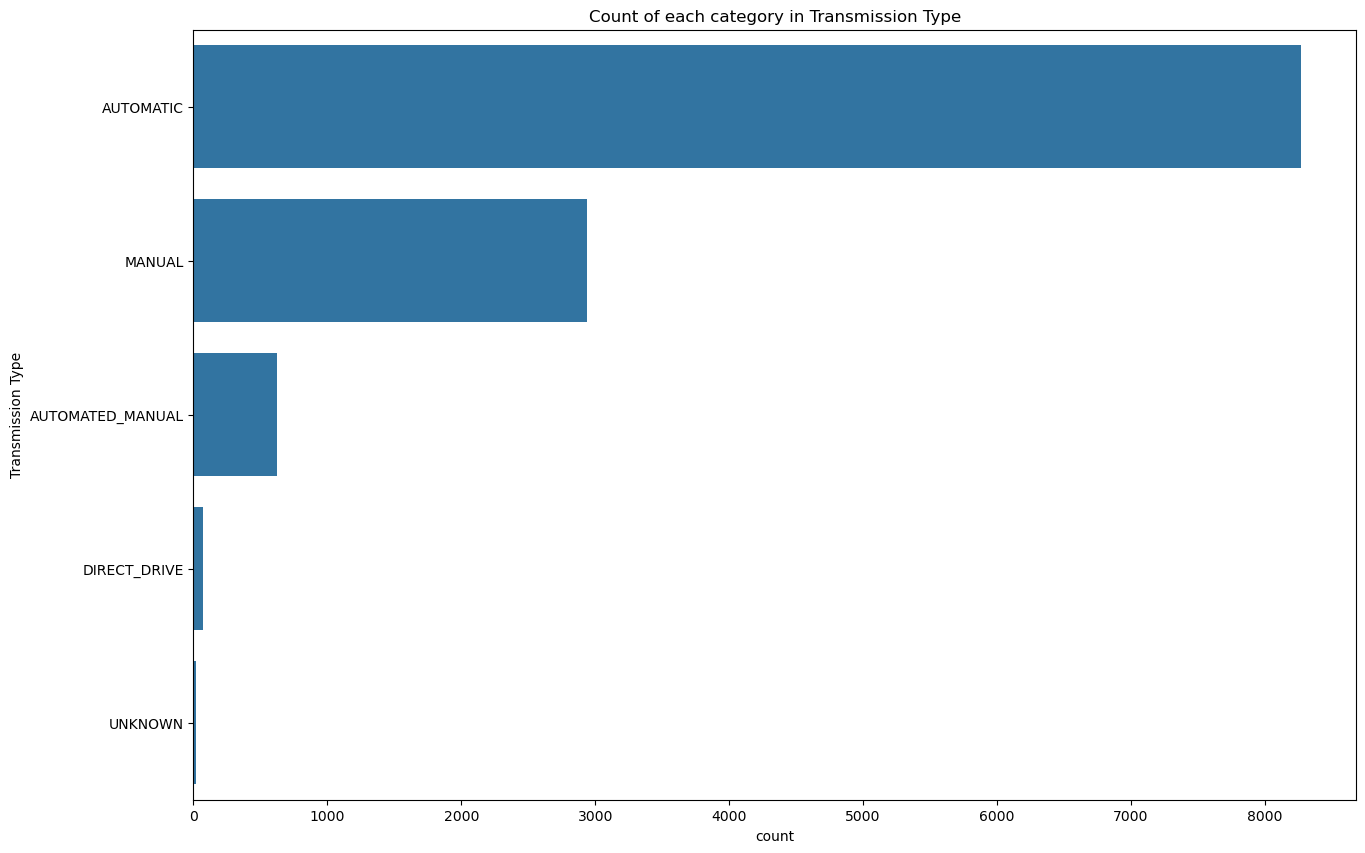

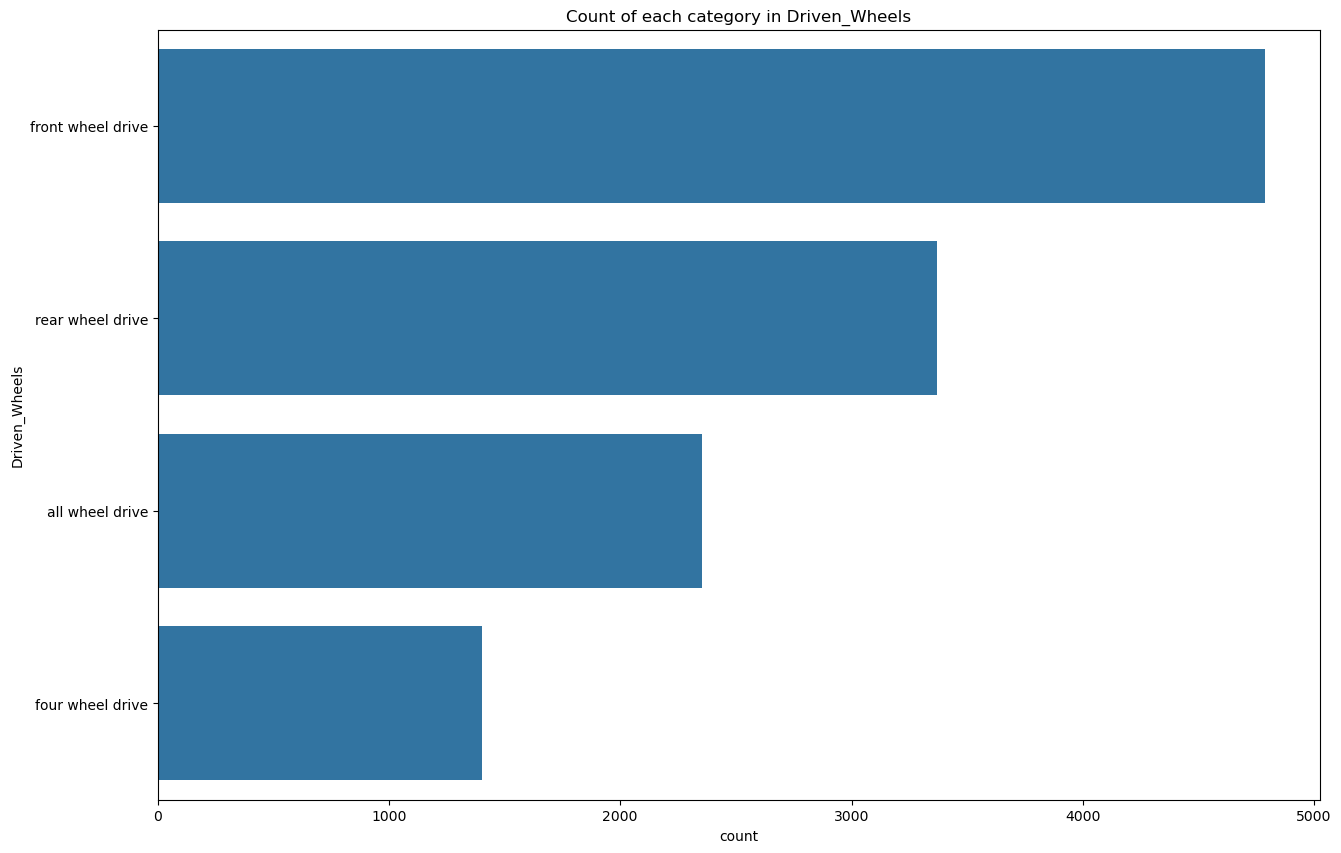

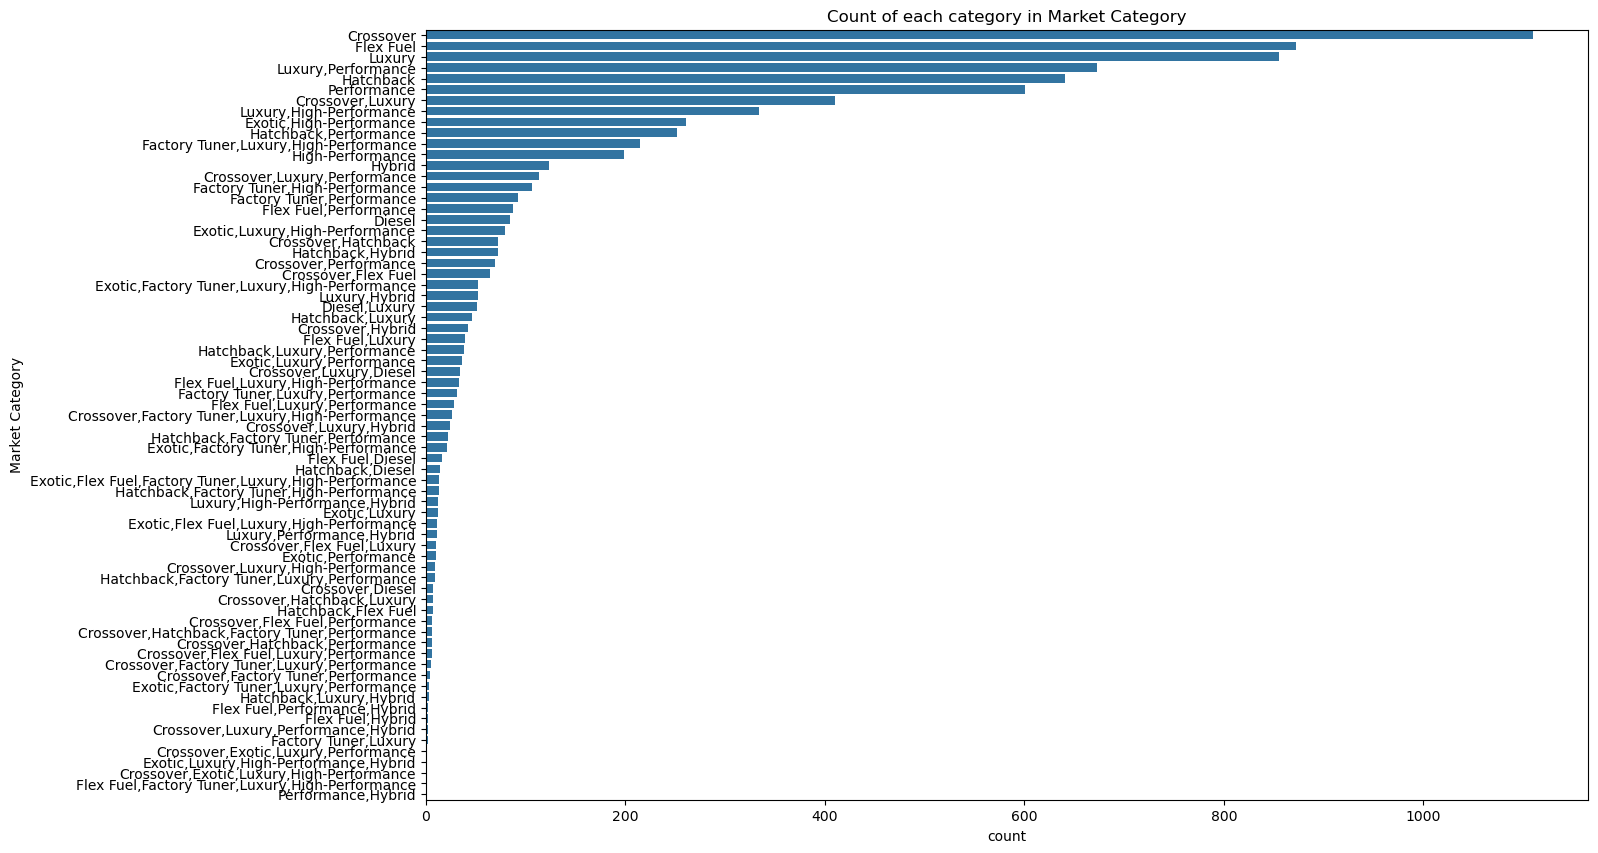

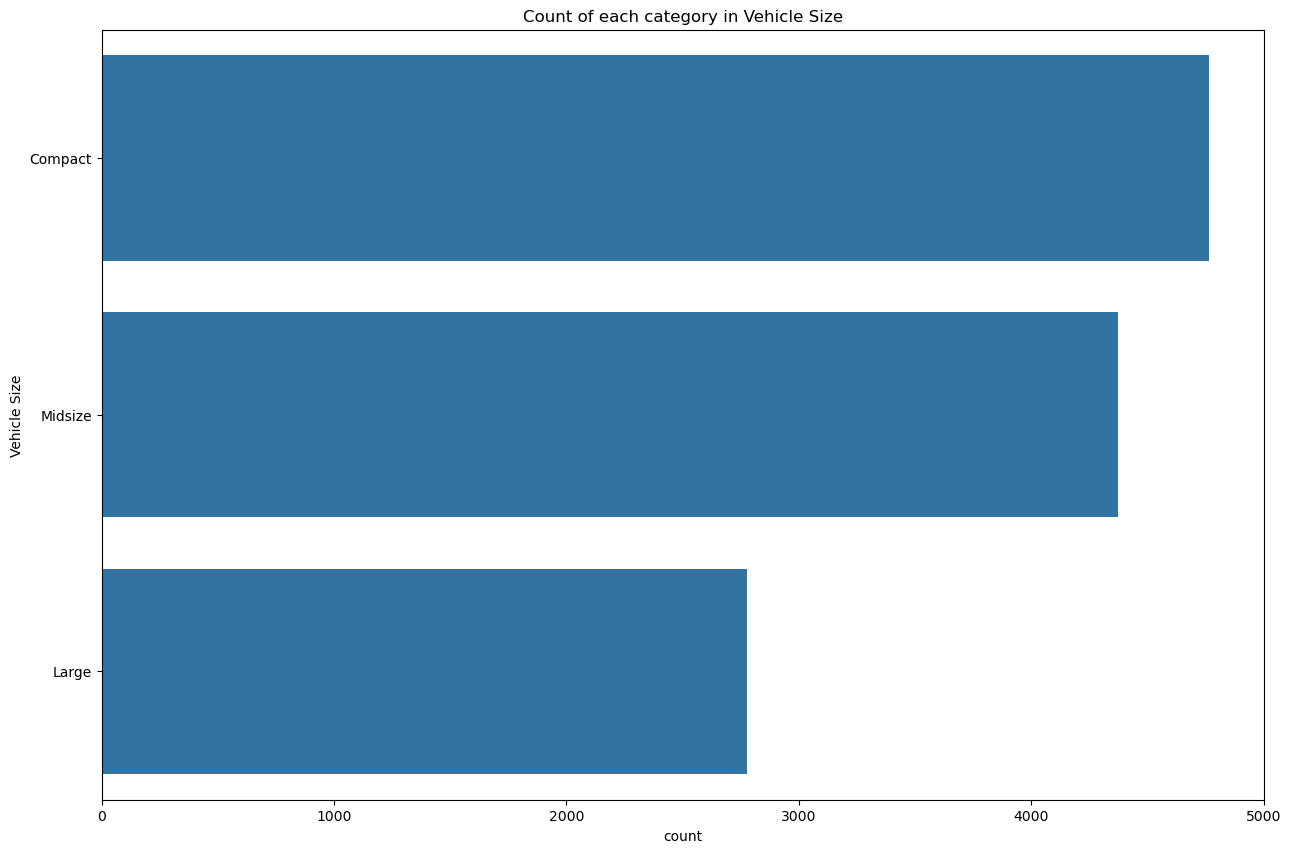

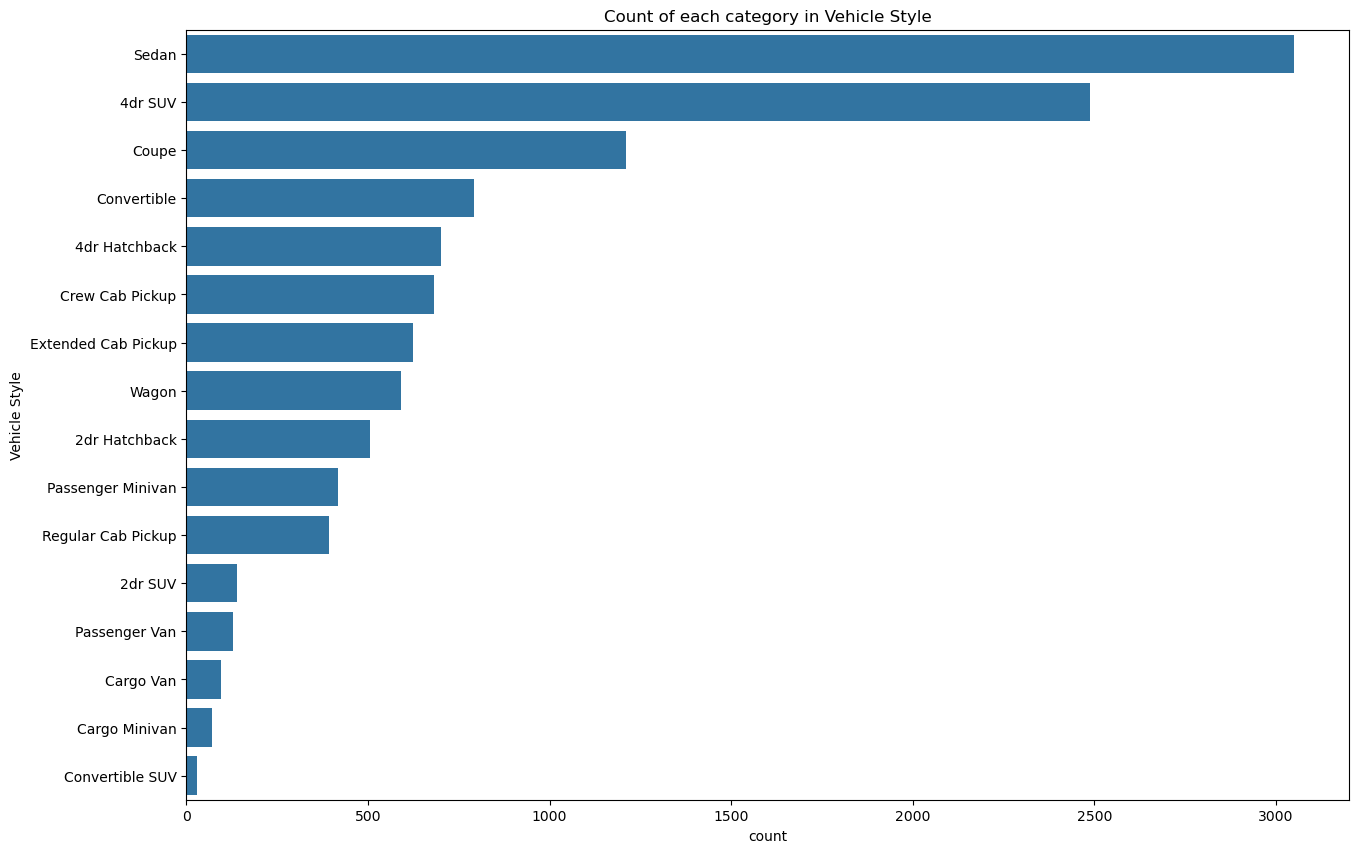

In [8]:
categorical_columns = ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style']

for col in categorical_columns:
    if col == 'Model':
        plt.figure(figsize=(15, 160))
        plt.tight_layout()
    else:
        plt.figure(figsize=(15, 10))
    sns.countplot(y=car_data[col], order=car_data[col].value_counts().index)
    plt.title(f'Count of each category in {col}')
    plt.show()

In [9]:
for col in categorical_columns:
    #print the number of classes in each column
    print(f'{col}: {car_data[col].nunique()} classes')
    

Make: 48 classes
Model: 915 classes
Engine Fuel Type: 10 classes
Transmission Type: 5 classes
Driven_Wheels: 4 classes
Market Category: 71 classes
Vehicle Size: 3 classes
Vehicle Style: 16 classes


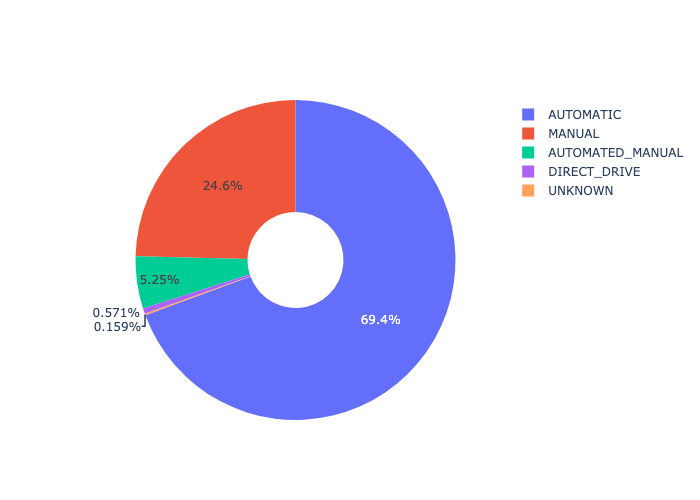

In [10]:
# plot the number of automatic and manual cars

fig = go.Figure(data=[go.Pie(labels=car_data['Transmission Type'], hole=.3)])
fig.show('png')

Seems that there is quite a lot of automatic cars in the data set so I would not change the AUTOMATED_MANUA to AUTOMATIC. I will remove the AUTOMATED_MANUAL, DIRECT_DRIVE and UNKNOWN from the column 'Transmission Type'

### REMOVING ROWS WITH 'AUTOMATED_MANUAL', 'DIRECT_DRIVE' AND 'UNKNOWN' FROM 'Transmission Type' COLUMN


In [11]:
# remove the rows with values in the list (AUTOMATED_MANUAL, DIRECT_DRIVE, UNKNOWN) 
values = ['AUTOMATED_MANUAL', 'DIRECT_DRIVE', 'UNKNOWN']
# remove rows with values in the list
car_data = car_data[~car_data['Transmission Type'].isin(values)]
car_data.shape[0]

11201

In [12]:
car_data['Transmission Type'].value_counts()

Transmission Type
AUTOMATIC    8266
MANUAL       2935
Name: count, dtype: int64

After removing the rows with values there is still plenty of data left (11201 rows) for the classifier to learn from.

# More visualizations

<Axes: >

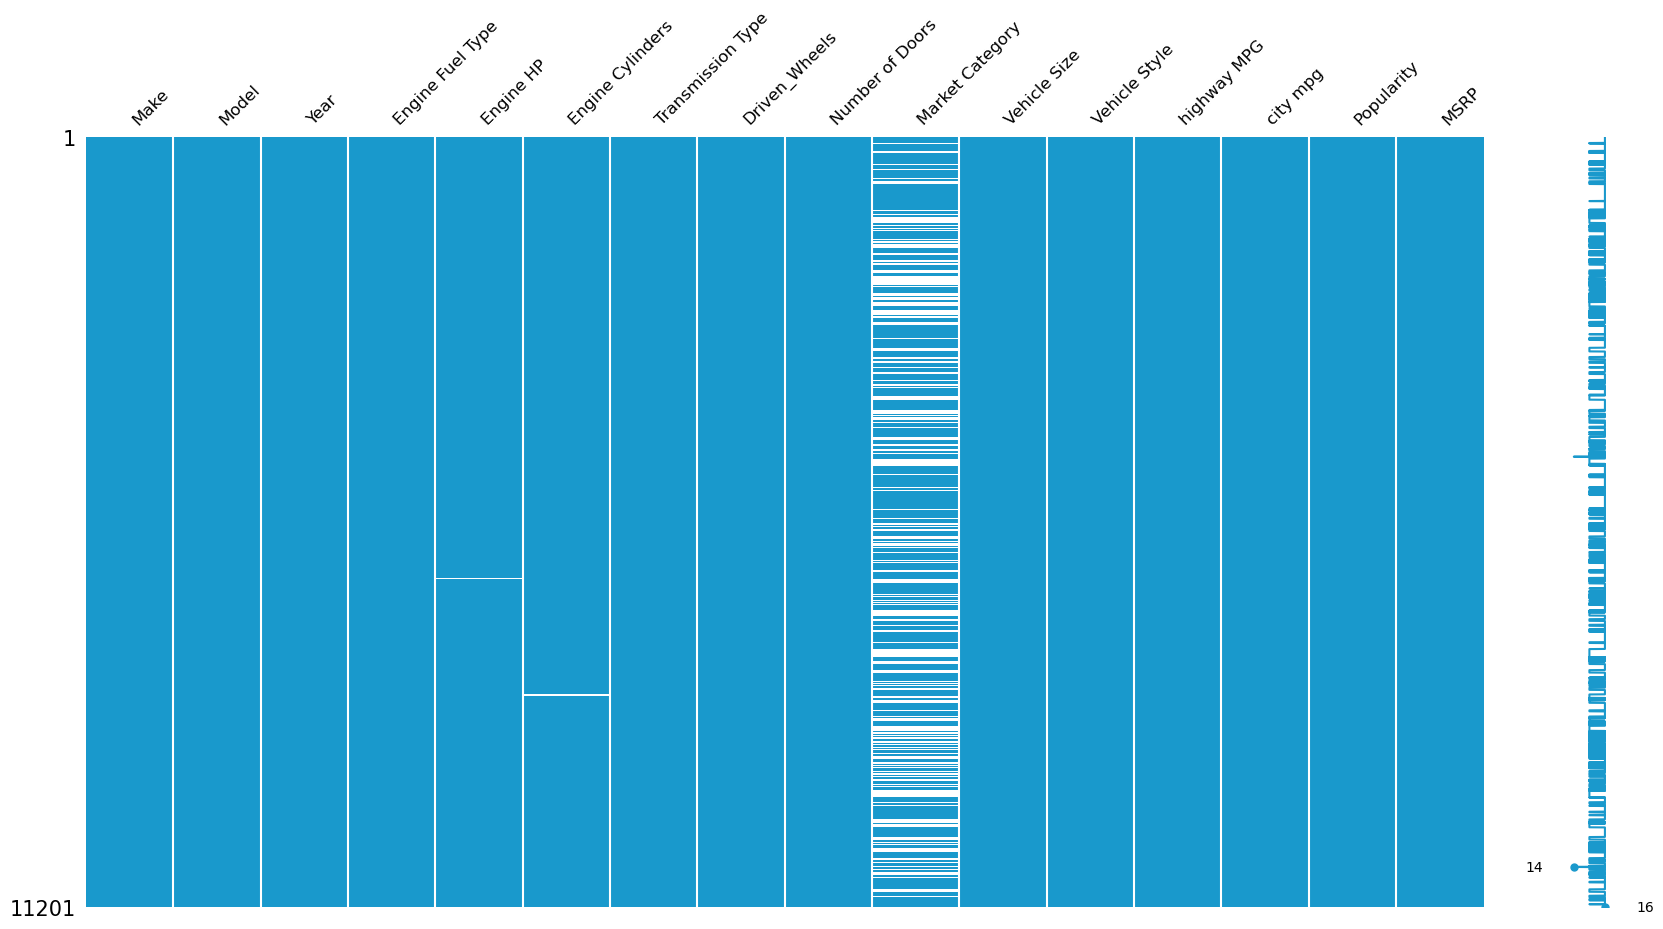

In [13]:
msno.matrix(car_data,color=(0.1, 0.6, 0.8), figsize=(20, 10), fontsize=12)


In [14]:
# lets check the number of missing values in the dataset
car_data.isnull().sum()


Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              25
Engine Cylinders       20
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3706
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

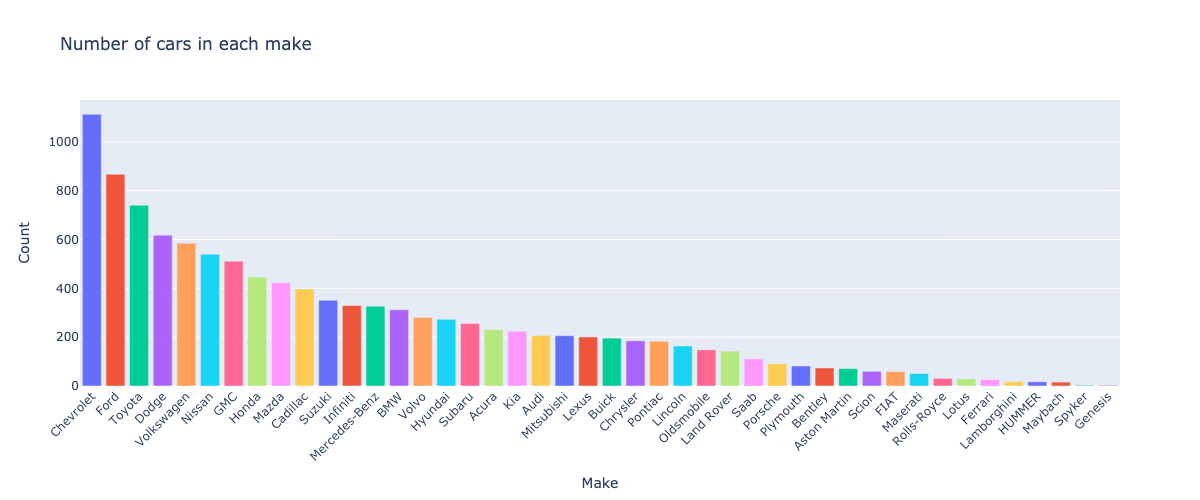

In [15]:
fig = px.bar(car_data['Make'].value_counts(), 
                x=car_data['Make'].value_counts().index, 
                y=car_data['Make'].value_counts().values, 
                title='Number of cars in each make',
                labels={'x': 'Make', 'y': 'Count'}, 
                color=car_data['Make'].value_counts().index)
fig.update_layout(width=1200, height=500, xaxis_tickangle=-45, showlegend=False)
fig.show('png')

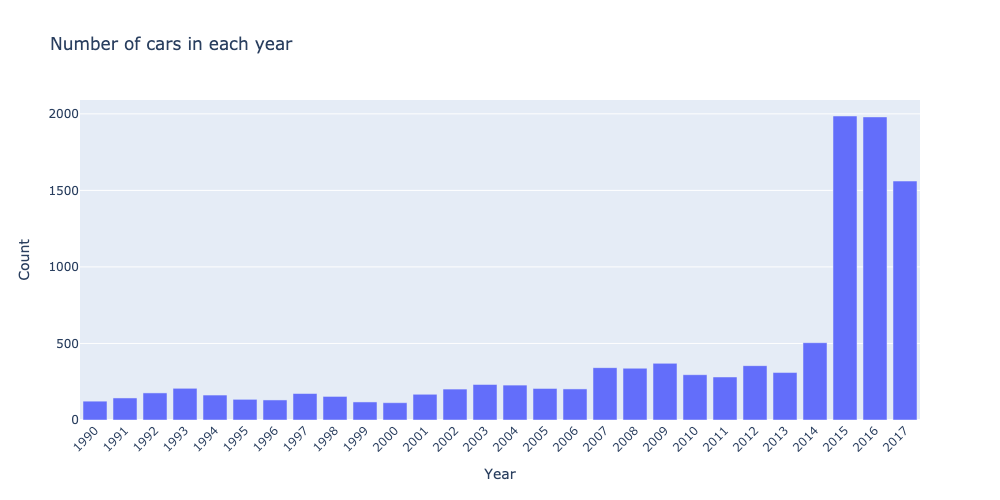

In [16]:
fig = px.bar(car_data['Year'].value_counts(),
                x=car_data['Year'].value_counts().index,
                y=car_data['Year'].value_counts().values,
                title='Number of cars in each year',
                labels={'x': 'Year', 'y': 'Count'})

fig.update_layout(width=1000, height=500, xaxis_tickangle=-45, xaxis=dict(tickmode='linear'))
fig.show('png')


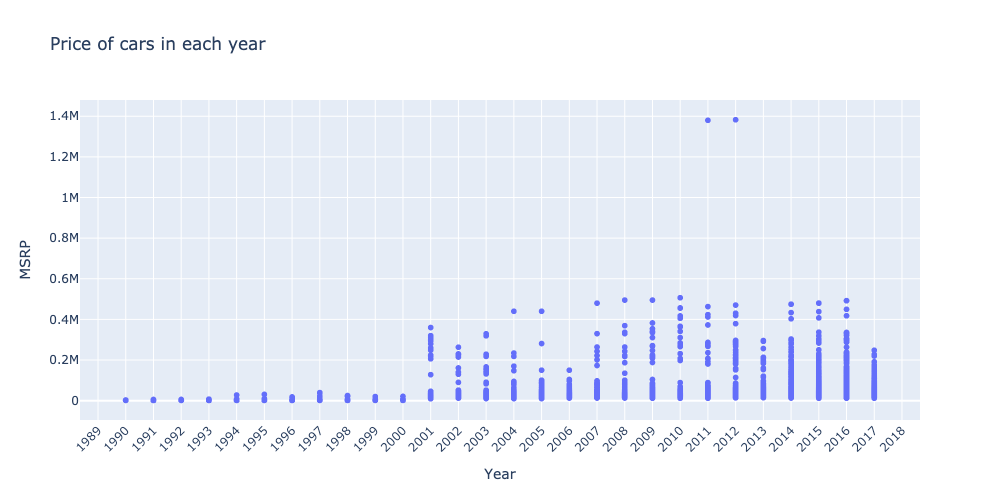

In [17]:
fig = px.scatter(car_data, x='Year', y='MSRP', title='Price of cars in each year')
fig.update_layout(width=1000, height=500, xaxis_tickangle=-45, xaxis=dict(tickmode='linear'))
fig.show('png')

In [18]:
# get the row with the highest price
car_data[car_data['MSRP'] == car_data['MSRP'].max()]

Make      Model  Year             Engine Fuel Type  Engine HP  \
6351  Maybach  Landaulet  2012  premium unleaded (required)      620.0   

      Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
6351              12.0         AUTOMATIC  rear wheel drive              4.0   

                Market Category Vehicle Size Vehicle Style  highway MPG  \
6351  Exotic,Luxury,Performance        Large   Convertible           16   

      city mpg  Popularity     MSRP  
6351        10          67  1382750

In [19]:
car_data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              25
Engine Cylinders       20
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3706
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

# Filling missing values

In [20]:
car_data['Engine Cylinders'].value_counts()

Engine Cylinders
6.0     4408
4.0     4366
8.0     1922
5.0      225
12.0     189
10.0      41
3.0       30
Name: count, dtype: int64

In [21]:
# fill missing values
# here using the mean from the column 'Engine Fuel Type' to fill the missing values
car_data.loc[:, 'Engine Fuel Type'] = car_data['Engine Fuel Type'].fillna(car_data['Engine Fuel Type'].mode()[0])

# fill values with NaN with the mean of the column
car_data.loc[:, 'Engine HP'] = car_data['Engine HP'].fillna(car_data['Engine HP'].mean())

# fill values with NaN with the mode of the column (column is categorical)
car_data.loc[:, 'Engine Cylinders'] = car_data['Engine Cylinders'].fillna(car_data['Engine Cylinders'].mode()[0])

# fill values with NaN with the mean of the column
car_data.loc[:, 'Number of Doors'] = car_data['Number of Doors'].fillna(car_data['Number of Doors'].mean())


car_data.loc[:, 'Market Category'] = car_data['Market Category'].fillna(car_data['Market Category'].mode()[0])

In [22]:
# number of missing values in each column

car_data.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

# Categorical values into numerical values

In [23]:
# converting the categorical columns to numerical columns
data_initial_model = car_data.copy()

In [24]:
data_initial_model['Engine Fuel Type'].value_counts()

Engine Fuel Type
regular unleaded                                7115
premium unleaded (required)                     1725
premium unleaded (recommended)                  1268
flex-fuel (unleaded/E85)                         890
diesel                                           115
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: count, dtype: int64

In [25]:
data_initial_model['Engine Fuel Type'] = data_initial_model['Engine Fuel Type'].str.replace(r"\(.*\)", "", regex=True)


In [26]:
data_initial_model['Engine Fuel Type'].value_counts()

Engine Fuel Type
regular unleaded     7115
premium unleaded     2993
flex-fuel             976
diesel                115
natural gas             2
Name: count, dtype: int64

In [27]:
data_initial_model['Engine Fuel Type'].unique()

array(['premium unleaded ', 'regular unleaded', 'flex-fuel ', 'diesel',
       'natural gas'], dtype=object)

In [28]:
data_initial_model.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [29]:

for col in cat_cols:
    print(f'{col}: {data_initial_model[col].nunique()} classes')

Make: 44 classes
Model: 865 classes
Engine Fuel Type: 5 classes
Transmission Type: 2 classes
Driven_Wheels: 4 classes
Market Category: 69 classes
Vehicle Size: 3 classes
Vehicle Style: 16 classes


If there is less than 10 classes we want to use one hot encoding, otherwise we can use label encoding.



In [30]:
# under 10 classes are in columns 'Engine Fuel Type', 'Driven_Wheels', Vehicle Size'

data_initial_model = pd.get_dummies(data_initial_model, columns=['Engine Fuel Type', 'Driven_Wheels', 'Vehicle Size'], dtype=int)



In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = ['Make', 'Model', 'Market Category', 'Vehicle Style']
data_initial_model[categorical_columns] = data_initial_model[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

data_initial_model.dtypes

Make                                    int64
Model                                   int64
Year                                    int64
Engine HP                             float64
Engine Cylinders                      float64
Transmission Type                      object
Number of Doors                       float64
Market Category                         int64
Vehicle Style                           int64
highway MPG                             int64
city mpg                                int64
Popularity                              int64
MSRP                                    int64
Engine Fuel Type_diesel                 int64
Engine Fuel Type_flex-fuel              int64
Engine Fuel Type_natural gas            int64
Engine Fuel Type_premium unleaded       int64
Engine Fuel Type_regular unleaded       int64
Driven_Wheels_all wheel drive           int64
Driven_Wheels_four wheel drive          int64
Driven_Wheels_front wheel drive         int64
Driven_Wheels_rear wheel drive    

In [32]:
data_initial_model['Transmission Type'] = data_initial_model['Transmission Type'].map({'AUTOMATIC': 0, 'MANUAL': 1})


In [33]:
data_initial_model.dtypes

Make                                    int64
Model                                   int64
Year                                    int64
Engine HP                             float64
Engine Cylinders                      float64
Transmission Type                       int64
Number of Doors                       float64
Market Category                         int64
Vehicle Style                           int64
highway MPG                             int64
city mpg                                int64
Popularity                              int64
MSRP                                    int64
Engine Fuel Type_diesel                 int64
Engine Fuel Type_flex-fuel              int64
Engine Fuel Type_natural gas            int64
Engine Fuel Type_premium unleaded       int64
Engine Fuel Type_regular unleaded       int64
Driven_Wheels_all wheel drive           int64
Driven_Wheels_four wheel drive          int64
Driven_Wheels_front wheel drive         int64
Driven_Wheels_rear wheel drive    

# Correlation between the columns

In [34]:
data_initial_model.shape

(11201, 25)

<Axes: >

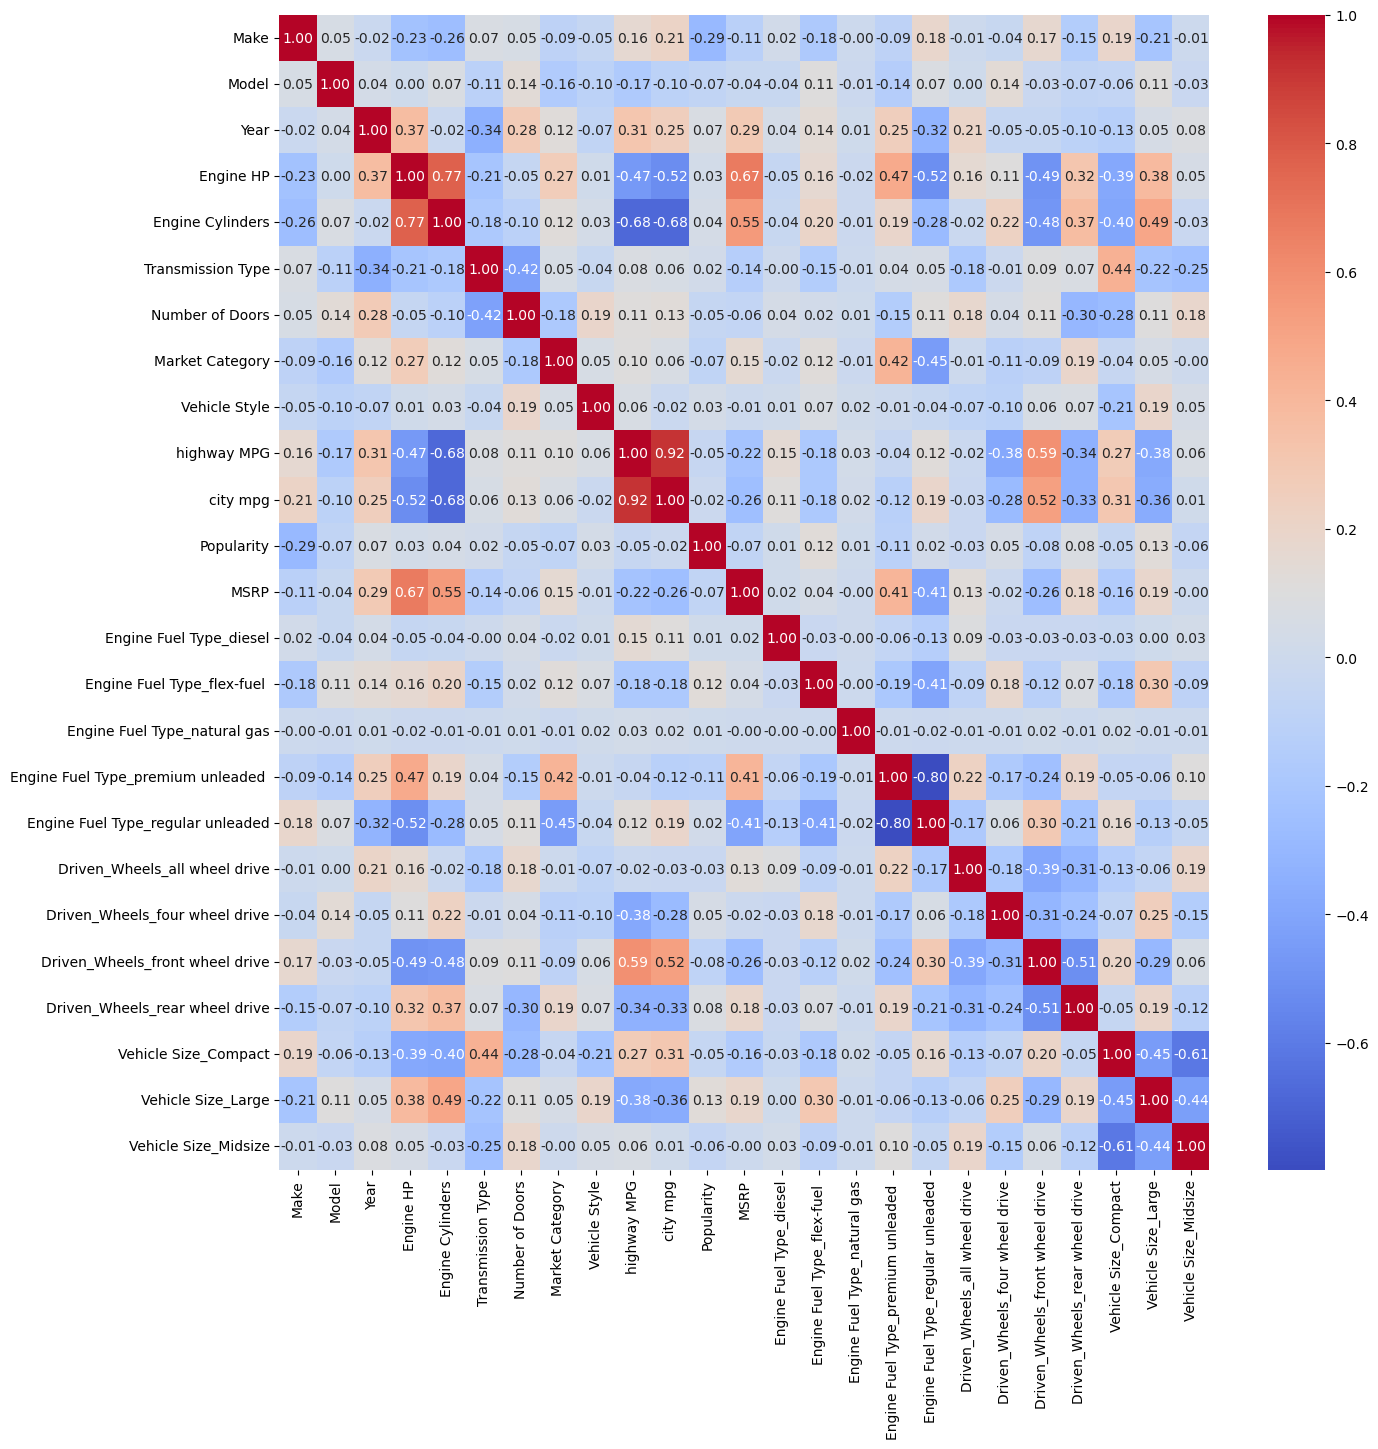

In [35]:
# lets see which columns correlate with the automatic and manual cars
plt.figure(figsize=(15, 15))
sns.heatmap(data_initial_model.corr(), annot=True, fmt='.2f', cmap='coolwarm')



### note
Multicollinearity is a problem in regression analysis. It occurs when independent variables in a regression model are correlated. Multicollinearity can affect interpretability and efficiency of a random forest model. 


The 'Transmission type' column is correlated with the 'Vehicle size Compact' 

# Main task

Predicting the Transmission Type of the car based on the other columns.

In [36]:

y = data_initial_model['Transmission Type']
X = data_initial_model.drop(['Transmission Type'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

RF_model = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=20)
DT = DecisionTreeClassifier(random_state=0, max_depth=20)
RF_model.fit(X_train, y_train)
DT.fit(X_train, y_train)

print(f"Random forest classifier {RF_model.score(X_test, y_test)} and Decision Tree classifier {DT.score(X_test, y_test)}")




Random forest classifier 0.9616185659030051 and Decision Tree classifier 0.9526926509967272


# Feature importance



how much each feature reduces the impurity (e.g., Gini index or entropy).[[SKITLEARN]]

[SKITLEARN]: https://scikit-learn.org/dev/auto_examples/ensemble/plot_forest_importances.html#feature-importance-based-on-mean-decrease-in-impurity

## note from the sklearn:
Impurity-based feature importances can be misleading for high cardinality features (many unique values). See Permutation feature importance.

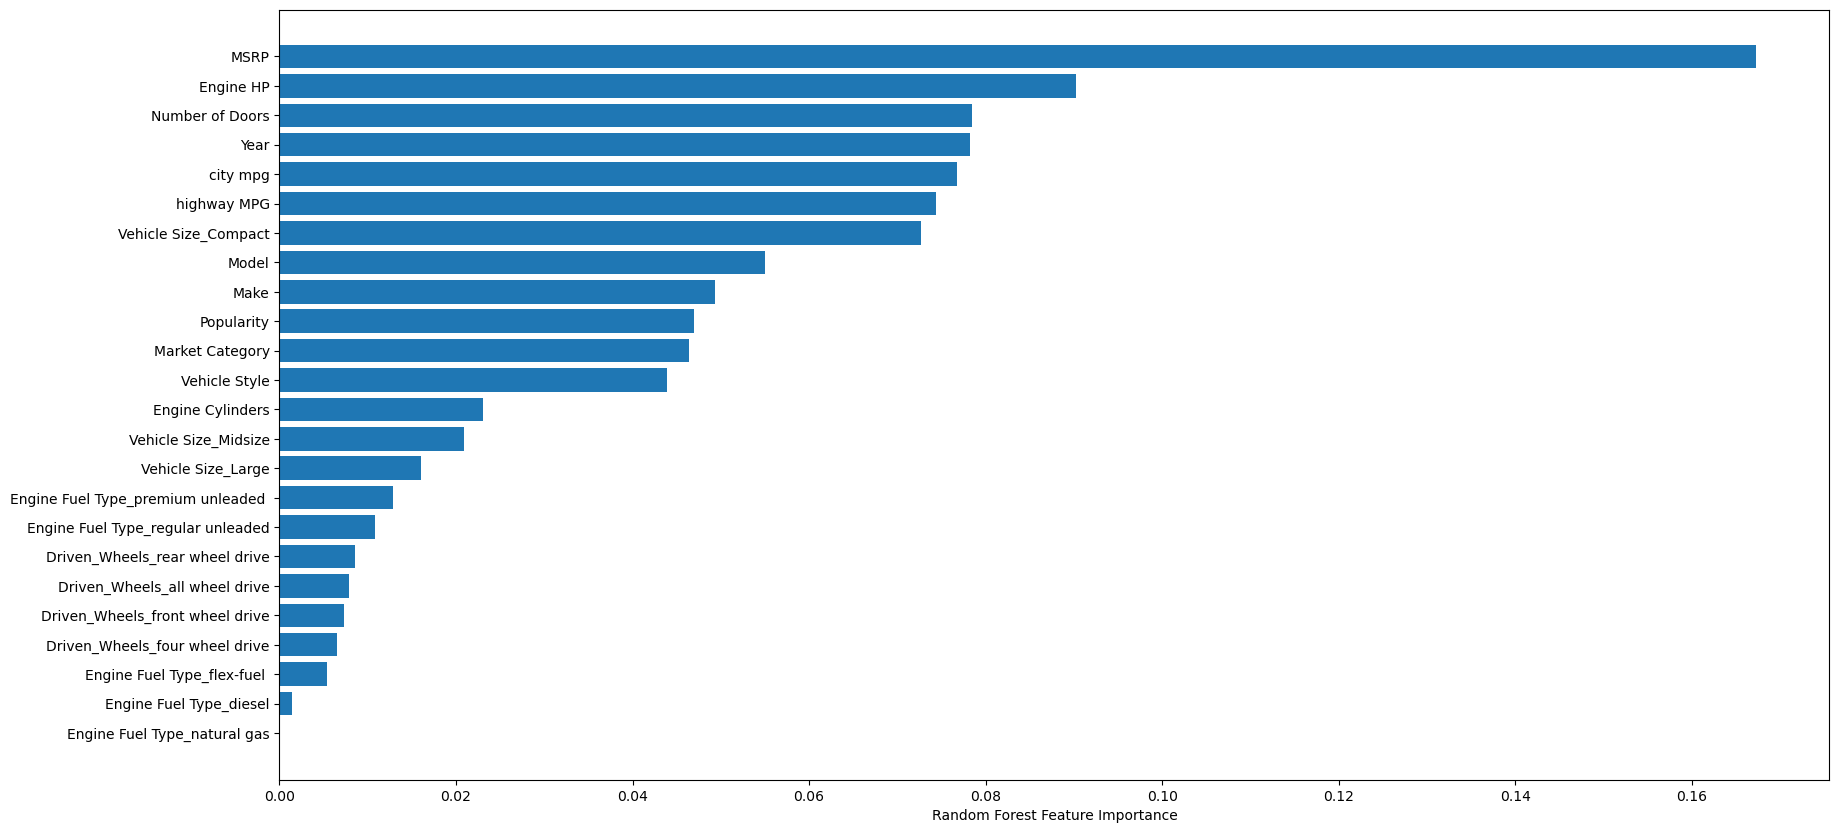

In [37]:
# get the feature importances
feature_importances = RF_model.feature_importances_

plt.figure(figsize=(20, 10))
sorted_idx = feature_importances.argsort()
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel('Random Forest Feature Importance')
plt.show()

# Confusion matrix

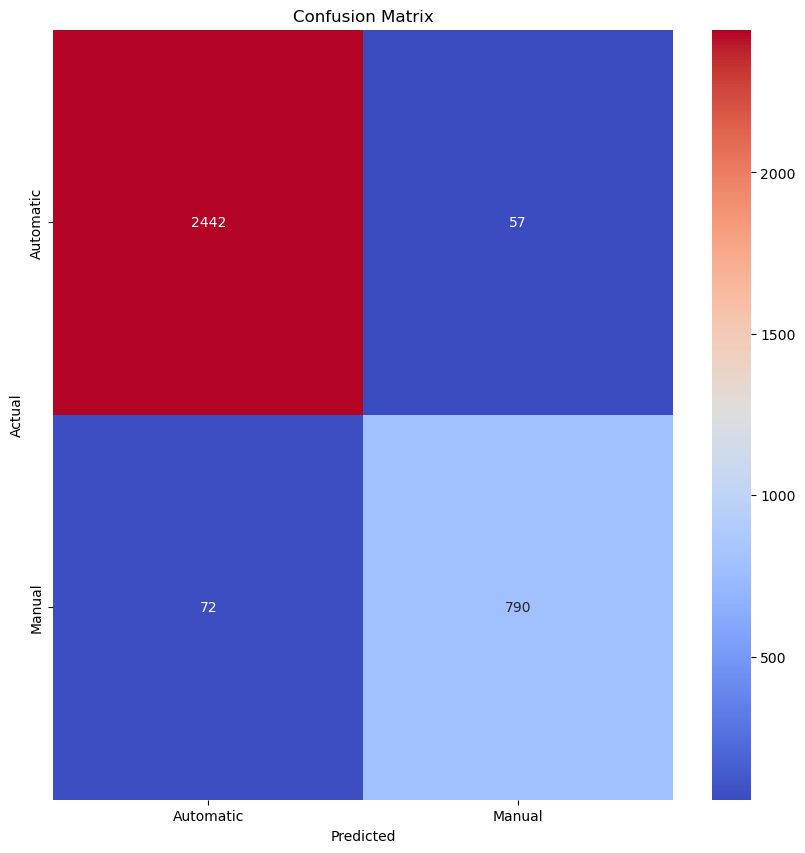

In [38]:
# plot the confusion matrix

from sklearn.metrics import confusion_matrix

y_pred = RF_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Automatic', 'Manual'], yticklabels=['Automatic', 'Manual'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


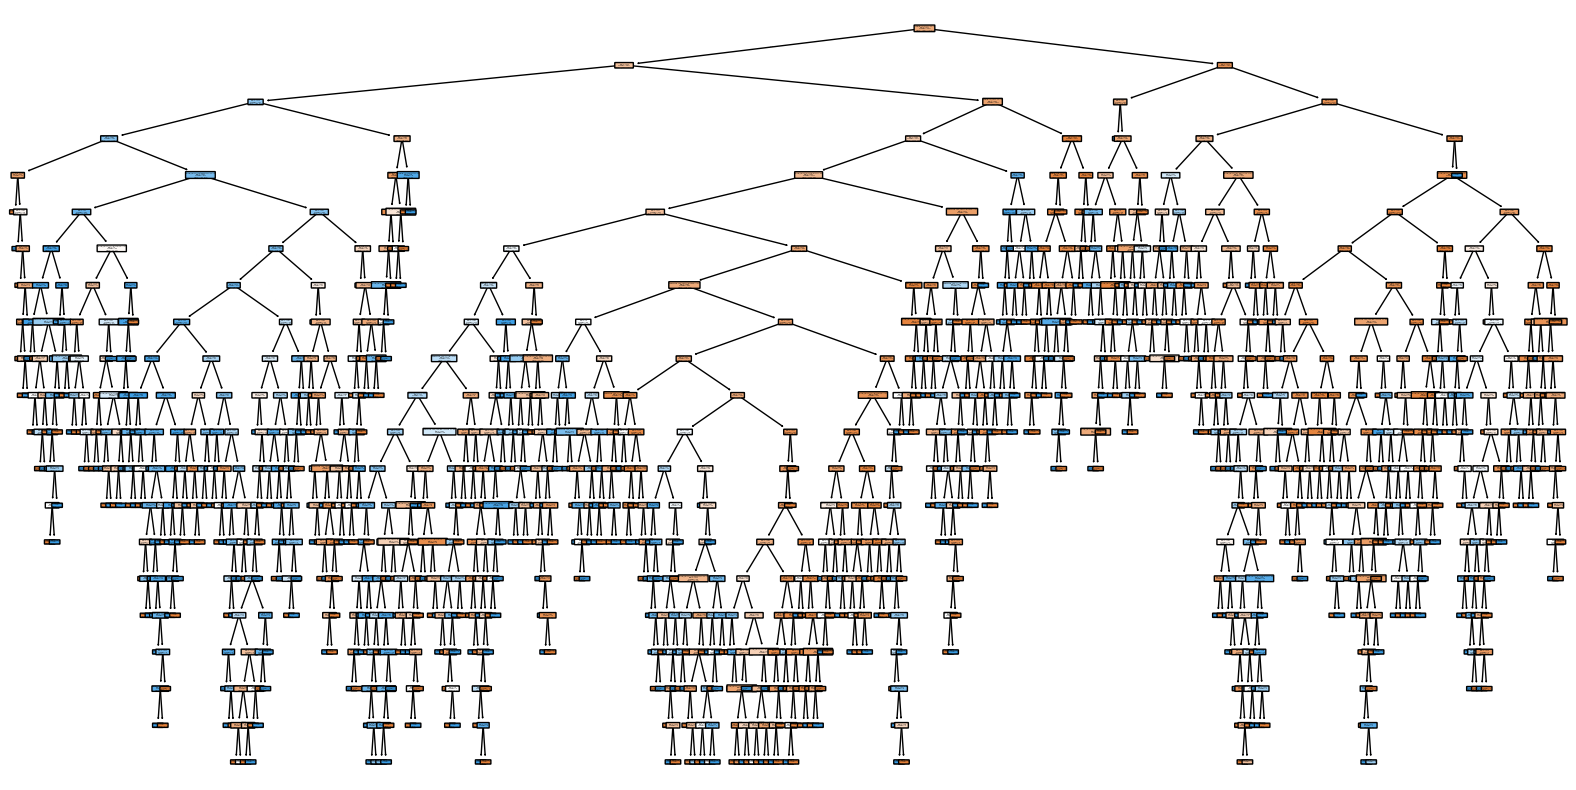

In [39]:
# plot the tree diagram

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(RF_model.estimators_[0], feature_names=X.columns, filled=True, rounded=True)
plt.show()


# Use most important features


In [40]:
# use the top 10 features to train the model
top_10_features = X.columns[sorted_idx][-10:]

X_train_top_10 = X_train[top_10_features]
X_test_top_10 = X_test[top_10_features]

RF_model_top_10 = RandomForestClassifier(random_state=0)
RF_model_top_10.fit(X_train_top_10, y_train)

RF_model_top_10.score(X_test_top_10, y_test)





0.9642963403748884

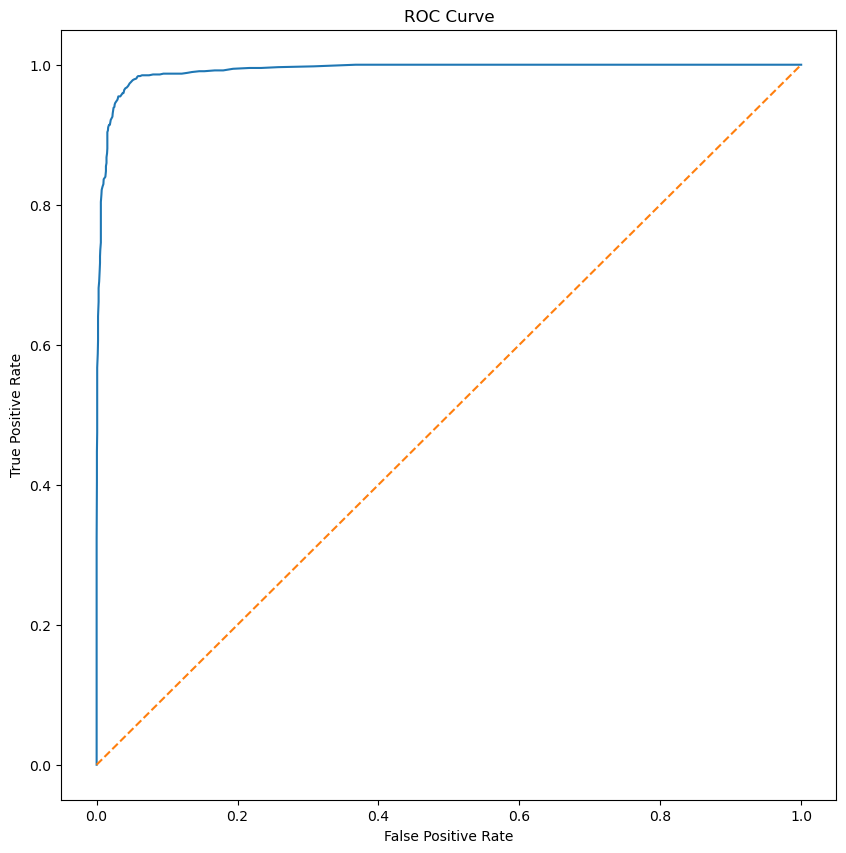

In [41]:
# roc curve

from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = RF_model_top_10.predict_proba(X_test_top_10)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Notes

1. Label Encoding if the categorical columns have a small number of categories and an implicit ordinal relationship is acceptable.
2. One-Hot Encoding when there are many categories, and you want to avoid implying any order